<a href="https://colab.research.google.com/github/Neetha13ie/VaticanCameos/blob/main/LoanDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'neethaieappen'
os.environ['KAGGLE_KEY'] ='55e8d870c422889a4c303aca6a30a4be'

In [ ]:
! kaggle datasets download -d 'larsen0966/sba-loans-case-data-set'

100% 112k/112k [00:00<00:00, 383kB/s]
100% 112k/112k [00:00<00:00, 383kB/s]


In [ ]:
! unzip /content/sba-loans-case-data-set.zip

Archive:  /content/sba-loans-case-data-set.zip
  inflating: SBAcase.11.13.17.csv    


In [ ]:
df = pd.read_csv('/content/SBAcase.11.13.17.csv')

In [ ]:
df.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


In [ ]:
df3.dtypes

Selected               int64
LoanNr_ChkDgt          int64
Zip                    int64
NAICS                  int64
ApprovalDate           int64
ApprovalFY             int64
Term                   int64
NoEmp                  int64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
DisbursementGross      int64
BalanceGross           int64
MIS_Status            object
ChgOffPrinGr           int64
GrAppv                 int64
SBA_Appv               int64
New                    int64
RealEstate             int64
Portion              float64
Recession              int64
daysterm               int64
Default                int64
dtype: object

In [ ]:
df.dropna(axis=1,inplace=True)

In [ ]:
df1=df.drop('Name',axis=1)


In [ ]:
df2=df1.drop('City',axis=1)


In [ ]:
df3=df2.drop('State',axis=1)

In [ ]:
df3.shape

(2102, 24)

In [ ]:
df3.head()

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,CreateJob,RetainedJob,...,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,Default
0,0,1004285007,92801,532420,15074,2001,36,1,0,0,...,P I F,0,30000,15000,0,0,0.5,0,1080,0
1,1,1004535010,90505,531210,15130,2001,56,1,0,0,...,P I F,0,30000,15000,0,0,0.5,1,1680,0
2,0,1005005006,92103,531210,15188,2001,36,10,0,0,...,P I F,0,30000,15000,0,0,0.5,0,1080,0
3,1,1005535001,92108,531312,15719,2003,36,6,0,0,...,P I F,0,50000,25000,0,0,0.5,0,1080,0
4,1,1005996006,91345,531390,16840,2006,240,65,3,65,...,P I F,0,343000,343000,0,1,1.0,0,7200,0


In [ ]:
le = LabelEncoder()
df3.iloc[:,14] = le.fit_transform(df3.iloc[:,14].values)

<ipython-input-29-8b59b9a2badb>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.iloc[:,14] = le.fit_transform(df3.iloc[:,14].values)


In [ ]:
X=df3.drop('Default', axis=1)
y= df3['Default']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
X_train.shape

(1576, 23)

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

[[341  13]
 [161  11]]


<Axes: >

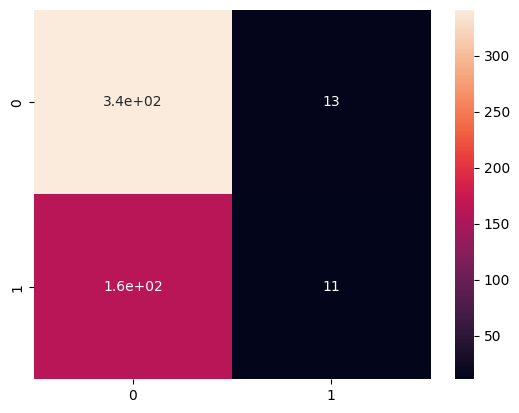

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.33079847908745247

In [ ]:
r = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
print(r)

      y_test  y_pred
1382       1       0
2066       0       0
1041       1       0
1665       0       0
865        0       0
...      ...     ...
565        1       0
1626       1       0
561        0       0
675        1       0
1455       0       0

[526 rows x 2 columns]


In [ ]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_test


1382    1
2066    0
1041    1
1665    0
865     0
       ..
565     1
1626    1
561     0
675     1
1455    0
Name: Default, Length: 526, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6692015209125475

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.67928287, 0.45833333])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.79672897, 0.1122449 ])

In [ ]:
r.value_counts()

y_test  y_pred
0       0         341
1       0         161
0       1          13
1       1          11
dtype: int64

In [ ]:
print("y_test",y_test)
print("y_pred",y_pred)

y_test 1382    1
2066    0
1041    1
1665    0
865     0
       ..
565     1
1626    1
561     0
675     1
1455    0
Name: Default, Length: 526, dtype: int64
y_pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.96      0.80       354
           1       0.46      0.06      0.11       172

    accuracy                           0.67       526
   macro avg       0.57      0.51      0.45       526
weighted avg       0.61      0.67      0.57       526

